# Explore here

In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing


df = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

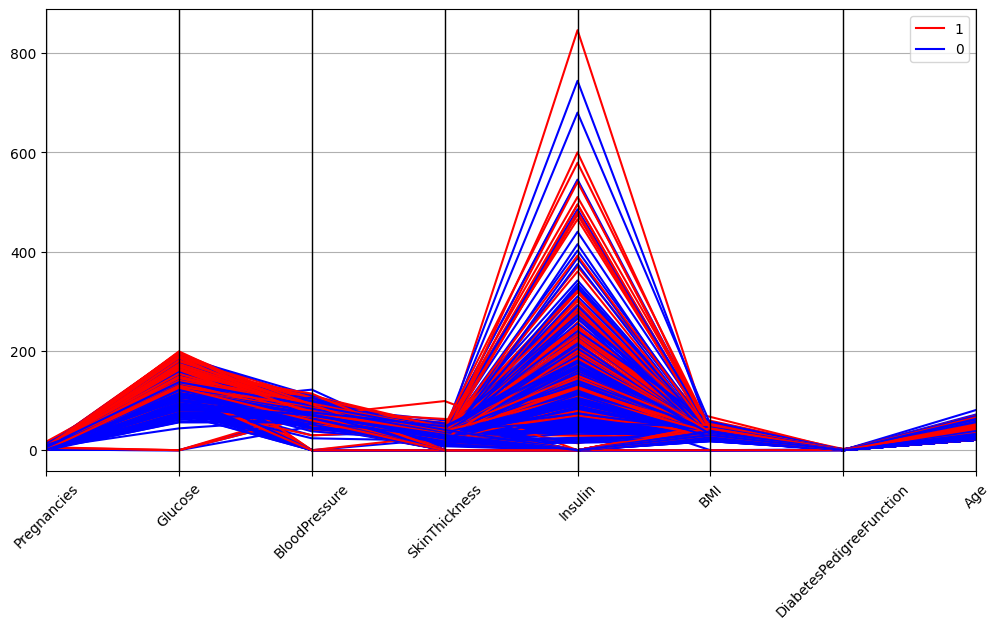

In [35]:
plt.figure(figsize=(12,6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show
#este plot indica que la variable insulina tiene datos notablemente distintos en las demas categorias

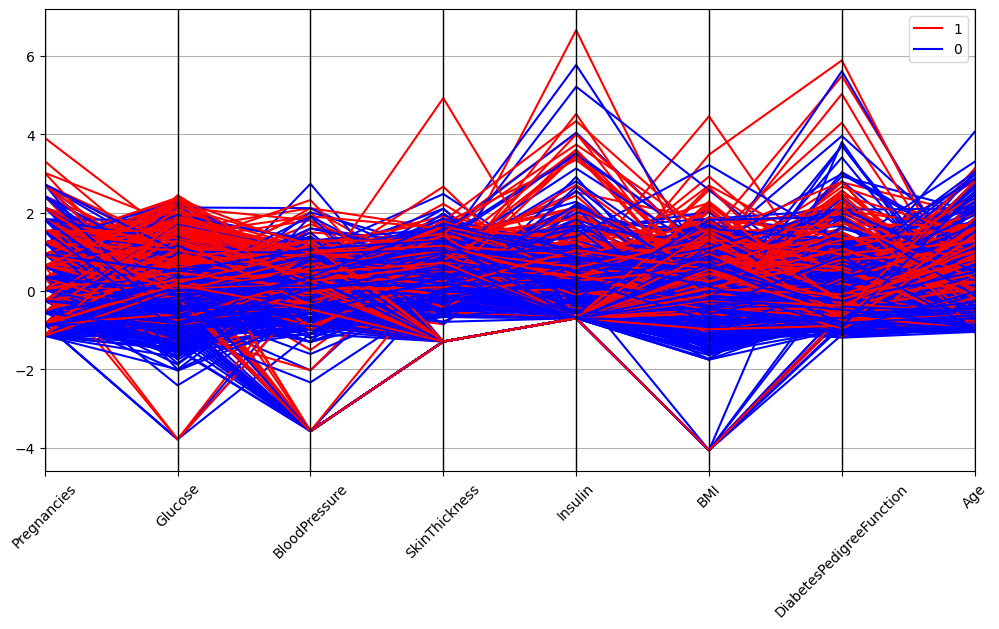

In [36]:
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns = df.columns[:-1])
data_sc['Outcome']= df.Outcome
plt.figure(figsize=(12,6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

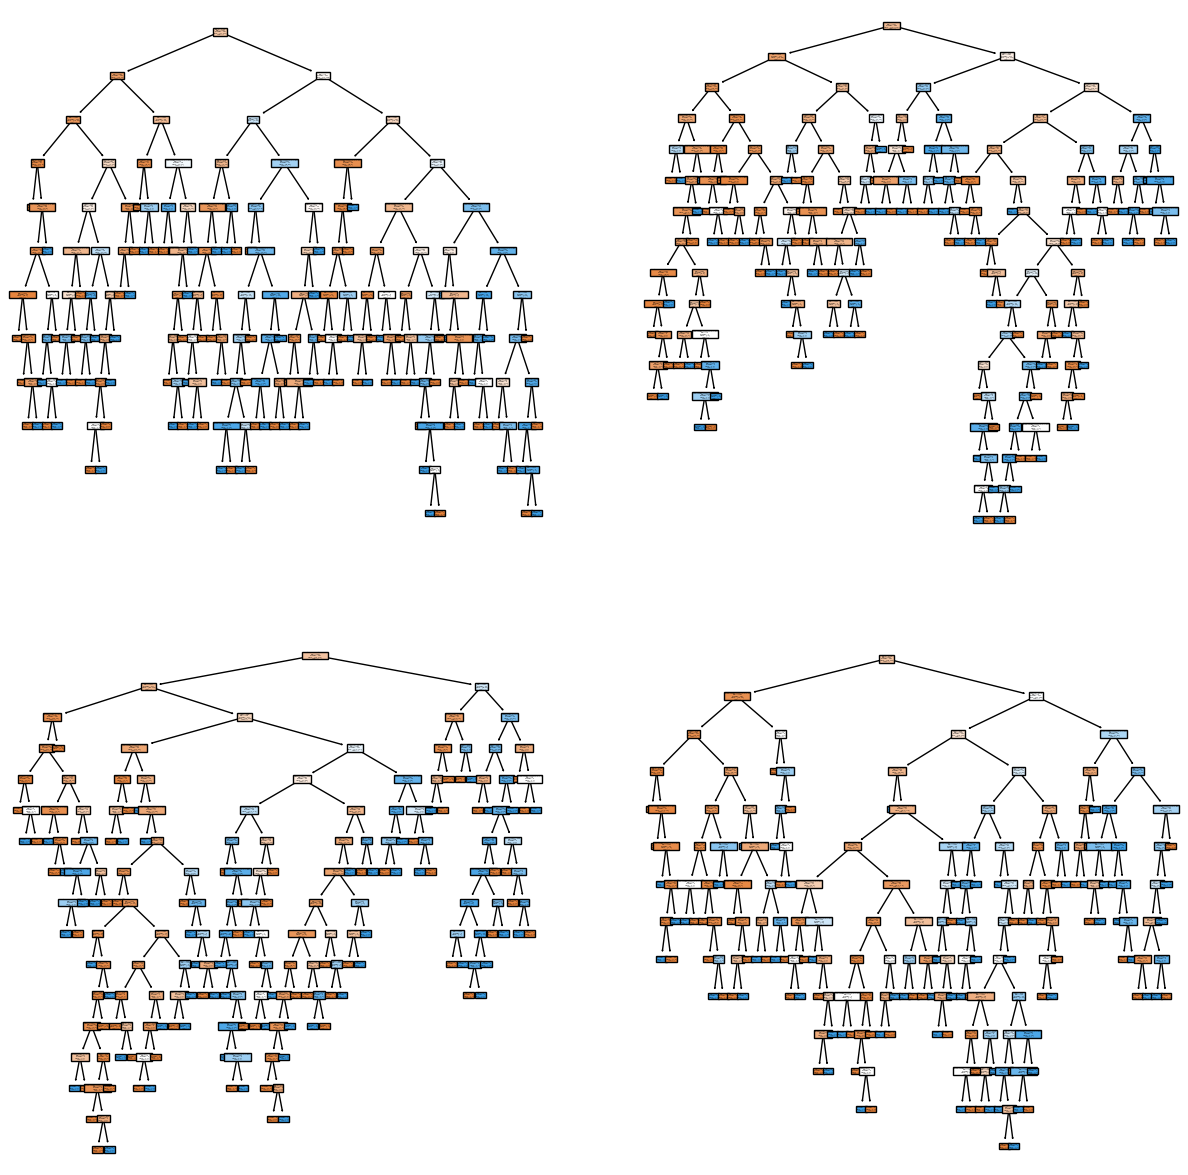

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [40]:
y_pred = model.predict(X_test)
y_pred #aqui ya me comienza a indicar quienes no pasan y si de acuerdo a los datos recopilados en el ds

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) #el modelo no tiene un nivel de aprendizaje perfecto pero es decente

0.7207792207792207

In [42]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

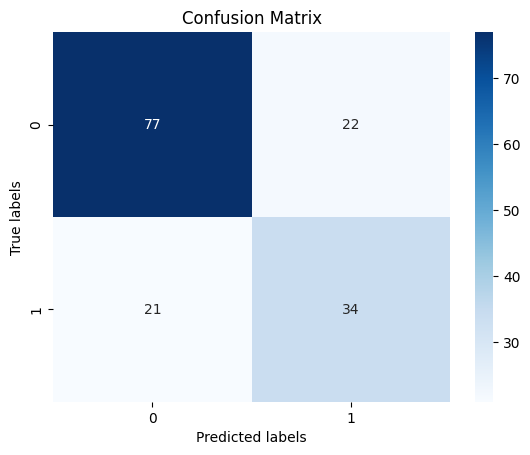

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


34 muestras fueron clasificadas verdaderamente positivas, 22 como falsos positivos, 77 como falsos negativo y 21 como verdadero negativo

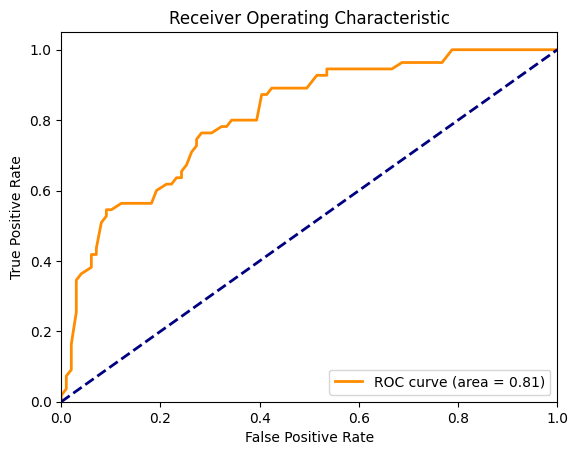

In [44]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Para este modelo de clasificación binaria 
un AUC de 0.81 indica que el modelo de clasificación binaria funciona bien distingue variables positivas y negativas correctamente, si bien no es perfecto, indica que la información recopilada es util teniendo en cuenta que se estan trabajando con datos reales

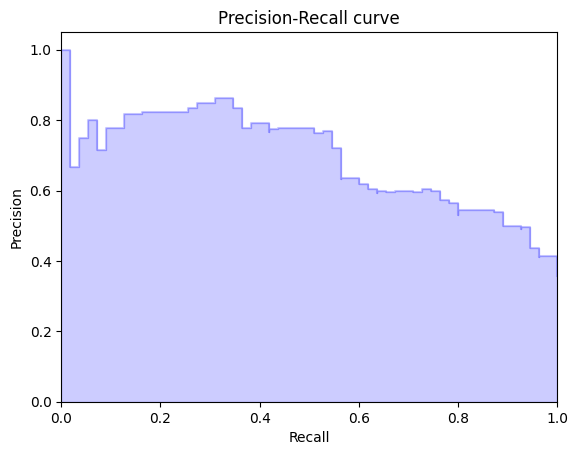

In [45]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Visualizar la curva de precisión-recall
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

plt.show()

Explica el rendimiento del modelo en funcion del punto de clasificacion de las muestras disponibles. En este caso, para una precision perfecta el recall es 0 y para un recall perfecto la precision es de 50% de muestras positivas correctas. En este caso la curva esta hacia la esquina superior izquierda, lo que detalla que el rendimiento no es tan optimo.